In [ ]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
all_data = pd.read_csv("KOTAKBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11
1,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12
2,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12
3,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11
4,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11


In [ ]:

Close_list = all_data['Close'].tolist()
total=len(Close_list);

In [ ]:
j=0
j=0
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D6=[]
D7=[]
D8=[]
D9=[]
D10=[]
DIFF=[]
PERCDIFF=[]
TARGET=[]
counter=0
for i in range(0,total):
  D1.append(Close_list[j+counter])
  D2.append(Close_list[j+counter+1])
  D3.append(Close_list[j+counter+2])
  D4.append(Close_list[j+counter+3])
  D5.append(Close_list[j+counter+4])
  D6.append(Close_list[j+counter+5])
  D7.append(Close_list[j+counter+6])
  D8.append(Close_list[j+counter+7])
  D9.append(Close_list[j+counter+8])
  D10.append(Close_list[j+counter+9])
  diff=Close_list[j+counter+9]-Close_list[j+counter+8]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[j+counter+9]
  PERCDIFF.append(percdiff)
  if(percdiff>1.5):
    TARGET.append('pos')
  elif(percdiff<-1.5):
    TARGET.append('neg')
  else:
    TARGET.append('neu')
  j=j+1;
  if(j==total-(counter+9)):
    break

In [ ]:
df1=pd.DataFrame(D1)
df2=pd.DataFrame(D2)
df3=pd.DataFrame(D3)
df4=pd.DataFrame(D4)
df5=pd.DataFrame(D5)
df6=pd.DataFrame(D6)
df7=pd.DataFrame(D7)
df8=pd.DataFrame(D8)
df9=pd.DataFrame(D9)
df10=pd.DataFrame(D10)
df11=pd.DataFrame(DIFF)
df12=pd.DataFrame(PERCDIFF)
df13=pd.DataFrame(TARGET)
df=pd.DataFrame()
df['Close']=all_data['Close']
df['D1']=df1
df['D2']=df2
df['D3']=df3
df['D4']=df4
df['D5']=df5
df['D6']=df6
df['D7']=df7
df['D8']=df8
df['D9']=df9
df['D10']=df10
df['DIFF']=df11
df['PERCDIFF']=df12
df['TARGET']=df13
df.dropna(inplace=True)
df.head(10)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,DIFF,PERCDIFF,TARGET
0,229.35,229.35,246.95,228.40,225.90,208.85,192.15,176.80,162.70,167.35,159.85,-7.50,-4.691899,neg
1,246.95,246.95,228.40,225.90,208.85,192.15,176.80,162.70,167.35,159.85,153.50,-6.35,-4.136808,neg
2,228.40,228.40,225.90,208.85,192.15,176.80,162.70,167.35,159.85,153.50,149.50,-4.00,-2.675585,neg
3,225.90,225.90,208.85,192.15,176.80,162.70,167.35,159.85,153.50,149.50,161.50,12.00,7.430341,pos
4,208.85,208.85,192.15,176.80,162.70,167.35,159.85,153.50,149.50,161.50,174.45,12.95,7.423330,pos
5,192.15,192.15,176.80,162.70,167.35,159.85,153.50,149.50,161.50,174.45,188.45,14.00,7.429026,pos
6,176.80,176.80,162.70,167.35,159.85,153.50,149.50,161.50,174.45,188.45,203.55,15.10,7.418325,pos
7,162.70,162.70,167.35,159.85,153.50,149.50,161.50,174.45,188.45,203.55,200.60,-2.95,-1.470588,neu
8,167.35,167.35,159.85,153.50,149.50,161.50,174.45,188.45,203.55,200.60,194.95,-5.65,-2.898179,neg
9,159.85,159.85,153.50,149.50,161.50,174.45,188.45,203.55,200.60,194.95,210.55,15.60,7.409166,pos


In [ ]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
df.head(5)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,DIFF,PERCDIFF,TARGET
0,229.35,229.35,246.95,228.40,225.90,208.85,192.15,176.80,162.70,167.35,159.85,-7.50,-4.691899,0
1,246.95,246.95,228.40,225.90,208.85,192.15,176.80,162.70,167.35,159.85,153.50,-6.35,-4.136808,0
2,228.40,228.40,225.90,208.85,192.15,176.80,162.70,167.35,159.85,153.50,149.50,-4.00,-2.675585,0
3,225.90,225.90,208.85,192.15,176.80,162.70,167.35,159.85,153.50,149.50,161.50,12.00,7.430341,2
4,208.85,208.85,192.15,176.80,162.70,167.35,159.85,153.50,149.50,161.50,174.45,12.95,7.423330,2


In [ ]:
features = ['D1','D2','D3','D4','D5','D6','D7','D8']
output_var=df['TARGET']
df1=df[features]

In [ ]:
df0=pd.DataFrame()
df0['TARGET']= np.where(df['TARGET']==0,'1',(np.where(df['TARGET']==1,'-1','0')))

df0.head()
df0.groupby('TARGET').size()

,TARGET
0,1
1,1
2,1
3,0
4,0


TARGET
-1    3070
0     1132
1     1045
dtype: int64

#Explore the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'TARGET')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

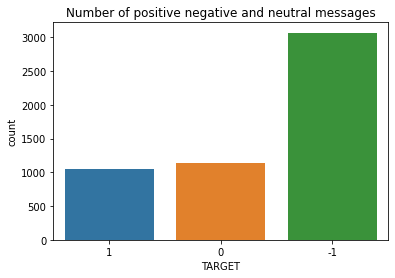

In [ ]:
sns.countplot(df0['TARGET'])
plt.xlabel('TARGET')
plt.title('Number of positive negative and neutral messages')

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform)
feature_transform.head()

,D1,D2,D3,D4,D5,D6,D7,D8
0,0.092529,0.100588,0.092094,0.090949,0.083141,0.075493,0.068463,0.062006
1,0.100588,0.092094,0.090949,0.083141,0.075493,0.068463,0.062006,0.064136
2,0.092094,0.090949,0.083141,0.075493,0.068463,0.062006,0.064136,0.060701
3,0.090949,0.083141,0.075493,0.068463,0.062006,0.064136,0.060701,0.057793
4,0.083141,0.075493,0.068463,0.062006,0.064136,0.060701,0.057793,0.055961


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa802e65d10>)

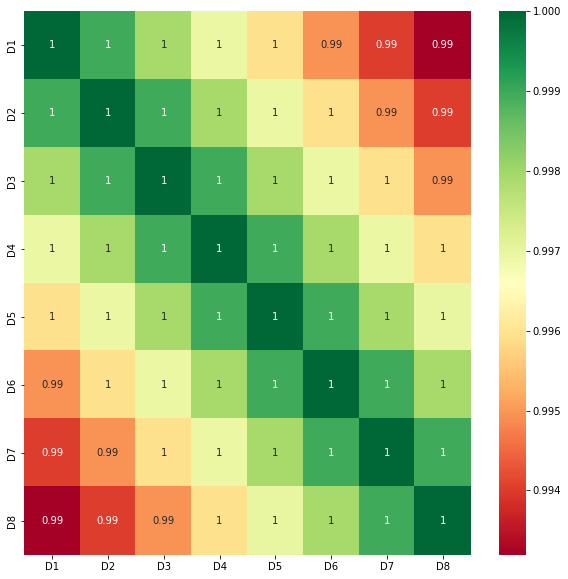

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(feature_transform.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(5).fit(feature_transform)
str(pca.explained_variance_ratio_.sum())

'0.999770546629228'

In [ ]:
pca_df=pd.DataFrame(pca.components_,columns=feature_transform.columns)
pca_df

,D1,D2,D3,D4,D5,D6,D7,D8
0,0.352818,0.353201,0.353484,0.353694,0.353821,0.353866,0.353831,0.353711
1,0.484477,0.419220,0.282572,0.100297,-0.098885,-0.281605,-0.419069,-0.484697
2,-0.469461,-0.184457,0.197372,0.454367,0.454828,0.198572,-0.183385,-0.469305
3,-0.411385,0.074759,0.494458,0.284000,-0.282602,-0.494642,-0.076696,0.411840
4,-0.336810,0.339180,0.367375,-0.368779,-0.370763,0.365506,0.340731,-0.336744


In [ ]:
#transformed features,instead of having 8,we have 5 now.this can now be plugged into any further modelling work
x_scaled_transf=pca.fit_transform(feature_transform)
x_scaled_transf=pd.DataFrame(x_scaled_transf,columns=('P1','P2','P3','P4','P5'))
x_scaled_transf.head()

,P1,P2,P3,P4,P5
0,-0.705929,0.034067,0.009164,0.000251,0.002563
1,-0.715977,0.037714,-0.001516,0.000527,-0.003225
2,-0.730077,0.033430,-0.005591,0.001506,0.001328
3,-0.742203,0.029624,-0.008836,-0.004547,0.001829
4,-0.754567,0.022864,-0.006401,-0.006651,-0.000755


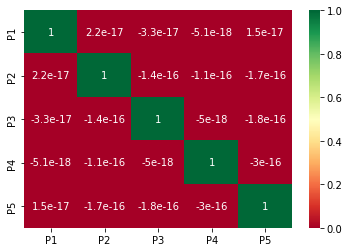

In [ ]:
correlation=x_scaled_transf.corr()
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
plt.show()

In [ ]:
output_var.head()

0    0
1    0
2    0
3    2
4    2
Name: TARGET, dtype: int8

In [ ]:
# separate into train and test sets
train_x,test_x,train_y,test_y=train_test_split(x_scaled_transf,output_var,test_size=0.20,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(4197, 5) (1050, 5) (4197,) (1050,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:

model = KNeighborsClassifier(n_neighbors=8)

In [ ]:
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
predicted_values=model.predict(test_x)
predicted_values

array([2, 0, 1, ..., 1, 1, 1], dtype=int8)

# **ACCURACY SCORE-K Neighbors Classifier**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predicted_values))

ACCUIRACY SCORE
0.5628571428571428


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.36      0.15      0.21       231
           1       0.61      0.90      0.73       598
           2       0.25      0.08      0.12       221

    accuracy                           0.56      1050
   macro avg       0.41      0.38      0.35      1050
weighted avg       0.48      0.56      0.49      1050



CONFUSION MATRIX


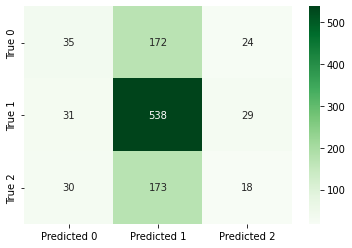

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,predicted_values)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(objective='multi:softprob')

In [ ]:
# make predictions for test data
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]


# **ACCURACY SCORE-XGB Classifier**




In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predictions))

ACCUIRACY SCORE
0.5695238095238095


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predictions))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.38      0.06      0.10       231
           1       0.58      0.96      0.73       598
           2       0.33      0.05      0.09       221

    accuracy                           0.57      1050
   macro avg       0.43      0.36      0.31      1050
weighted avg       0.49      0.57      0.45      1050



CONFUSION MATRIX


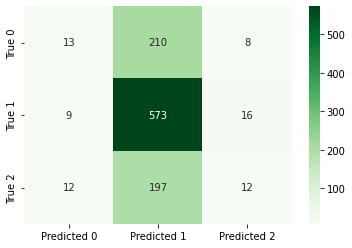

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,predictions)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [1]:
!jupyter nbconvert KOTAKpercdiff_1_5_SMP_KNN_XGBoost.ipynb

[NbConvertApp] Converting notebook KOTAKpercdiff_1_5_SMP_KNN_XGBoost.ipynb to html
[NbConvertApp] Writing 439846 bytes to KOTAKpercdiff_1_5_SMP_KNN_XGBoost.html
